## Problem Statement
- Development of a technique to predict missing environmental data for application in climate prediction (JABATAN METEOROLOGI MALAYSIA,  AMPANGAN MUDA Station)

### Outline
The overall aim of the research is the development of a technique to predict missing environmental data for climate prediction. This can be used to improve the understanding of past, present, and future climate conditions and their potential impacts on the environment and society. By developing a more accurate and reliable technique for predicting missing environmental data, researchers can improve the accuracy and reliability of climate prediction models, which are critical tools for informing environmental management, policy, and decision-making.

The ultimate goal of this research is to support efforts to mitigate and adapt to the impacts of climate change, such as climate change, sea level rise, and ecosystem disruption. By improving our ability to predict and understand these impacts, we can better prepare for them and develop effective strategies for managing and reducing their effects on the environment and society.



In [330]:
# import the necessary libraries
import numpy as np
import pandas as pd

# visuals libraries
import math
import glob


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None
import datetime as dt

In [331]:
# import and read file
df = pd.read_excel(r'C:\Users\user\Downloads\AmpaganMudaWSDel .xlsx')
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0            92       NaN   
1  2012      1    1     2  1014.5  24.3       23.0            93       NaN   
2  2012      1    1     3  1013.7  23.8       23.2            96       NaN   
3  2012      1    1     4  1012.9  23.6       23.1            97       NaN   
4  2012      1    1     5  1013.3  23.5       23.1            98       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN         0       0.0  
1         NaN         0       0.0  
2         NaN        57       1.8  
3         NaN        60       4.3  
4         NaN        60       9.8

In [332]:
# tail of the data
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20 -1.1  -1.1       -1.1            -1      -1.0   
24575  2014     12   31    21 -1.1  -1.1       -1.1            -1      -1.0   
24576  2014     12   31    22 -1.1  -1.1       -1.1            -1      -1.0   
24577  2014     12   31    23 -1.1  -1.1       -1.1            -1      -1.0   
24578  2014     12   31    24 -1.1  -1.1       -1.1            -1      -1.0   

       wind_speed  rain_dur  rain_amt  
24574        -1.1        -1      -1.1  
24575        -1.1        -1      -1.1  
24576        -1.1        -1      -1.1  
24577        -1.1        -1      -1.1  
24578        -1.1        -1      -1.1

## Features of the Dataset
Year

Month 

Day

Mean Surface Time ( MST )- Hour

Atmospheric Pressure ( Hpa )

Temperature ( ° C )

Dew point ( ° C )

Relative Humidity ( % )

Wind Direction ( ° )

Wind speed ( m/s )

Rainfall Duration( min )

Rainfall Amount ( mm )

## Data Inspection and Manipulation

In [333]:
# shape of the data
df.shape

(24579, 12)

In [334]:
# data columns
df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [335]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24579 entries, 0 to 24578
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24579 non-null  int64  
 1   Month         24579 non-null  int64  
 2   Day           24579 non-null  int64  
 3   MST           24579 non-null  int64  
 4   Hpa           24579 non-null  float64
 5   Temp          24579 non-null  float64
 6   Dew_point     24579 non-null  float64
 7   rel_humidity  24579 non-null  int64  
 8   wind_dir      16503 non-null  float64
 9   wind_speed    16503 non-null  float64
 10  rain_dur      24579 non-null  int64  
 11  rain_amt      24579 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.3 MB


In [336]:
# check for missing values
df.isnull().sum()

Year               0
Month              0
Day                0
MST                0
Hpa                0
Temp               0
Dew_point          0
rel_humidity       0
wind_dir        8076
wind_speed      8076
rain_dur           0
rain_amt           0
dtype: int64

#### Observation
- it is observed that Hpa(atmospheric pressure) has 2 missing values
- Temp(temperature) has 1 missing value
- wind dir(wind direction) has 8076 missing values
- wind_speed(wind speed) has 8076 missing values

In [337]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0] 
null_pct

Year            0.000000
Month           0.000000
Day             0.000000
MST             0.000000
Hpa             0.000000
Temp            0.000000
Dew_point       0.000000
rel_humidity    0.000000
wind_dir        0.328573
wind_speed      0.328573
rain_dur        0.000000
rain_amt        0.000000
dtype: float64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

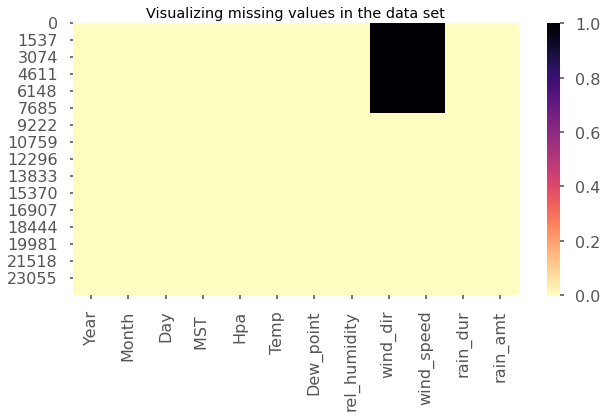

In [338]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(df.isnull(),  cbar = True, cmap = 'magma_r')

In [339]:
# descriptive statistics for all the features
df.describe()

Year         Month          Day          MST            Hpa  \
count  24579.000000  24579.000000  24579.00000  24579.000000  24579.000000   
mean    2012.986615      6.387933     15.78266     12.492494    887.217922   
std        0.802252      3.497451      8.88359      6.921909    334.178733   
min     2012.000000      1.000000      1.00000      1.000000     -1.100000   
25%     2012.000000      3.000000      8.00000      6.000000   1010.600000   
50%     2013.000000      6.000000     16.00000     12.000000   1012.600000   
75%     2014.000000      9.000000     23.00000     18.000000   1014.200000   
max     2014.000000     12.000000     31.00000     24.000000   1020.000000   

               Temp     Dew_point  rel_humidity      wind_dir    wind_speed  \
count  24579.000000  24579.000000  24579.000000  16503.000000  16503.000000   
mean      23.094719     19.896538     72.112820    122.788039      0.501515   
std        9.670987      8.040835     31.406057    119.758202      0.883804   
min       -1.100000     -1.100000     -1.000000     -1.000000     -1.100000   
25%       23.300000     21.500000     61.000000     10.000000      0.300000   
50%       24.800000     22.900000     85.000000     70.000000      0.500000   
75%       28.600000     23.800000     96.000000    240.000000      1.000000   
max       37.000000     27.600000    100.000000    360.000000     13.200000   

           rain_dur      rain_amt  
count  24579.000000  24579.000000  
mean       1.841206      0.131763  
std        8.575241      1.970461  
min       -1.000000     -1.100000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       60.000000     55.100000

## How to visualize pattern of missing values?
You can visualize missing values in the data using missingno package. It gives a very clear picture.

Visualize the presence of missing data. The matrix method will make a black bar for each column with the missing data points marked at various locations.

In [257]:
 # to visualize missing value
import missingno as msno

<AxesSubplot:>

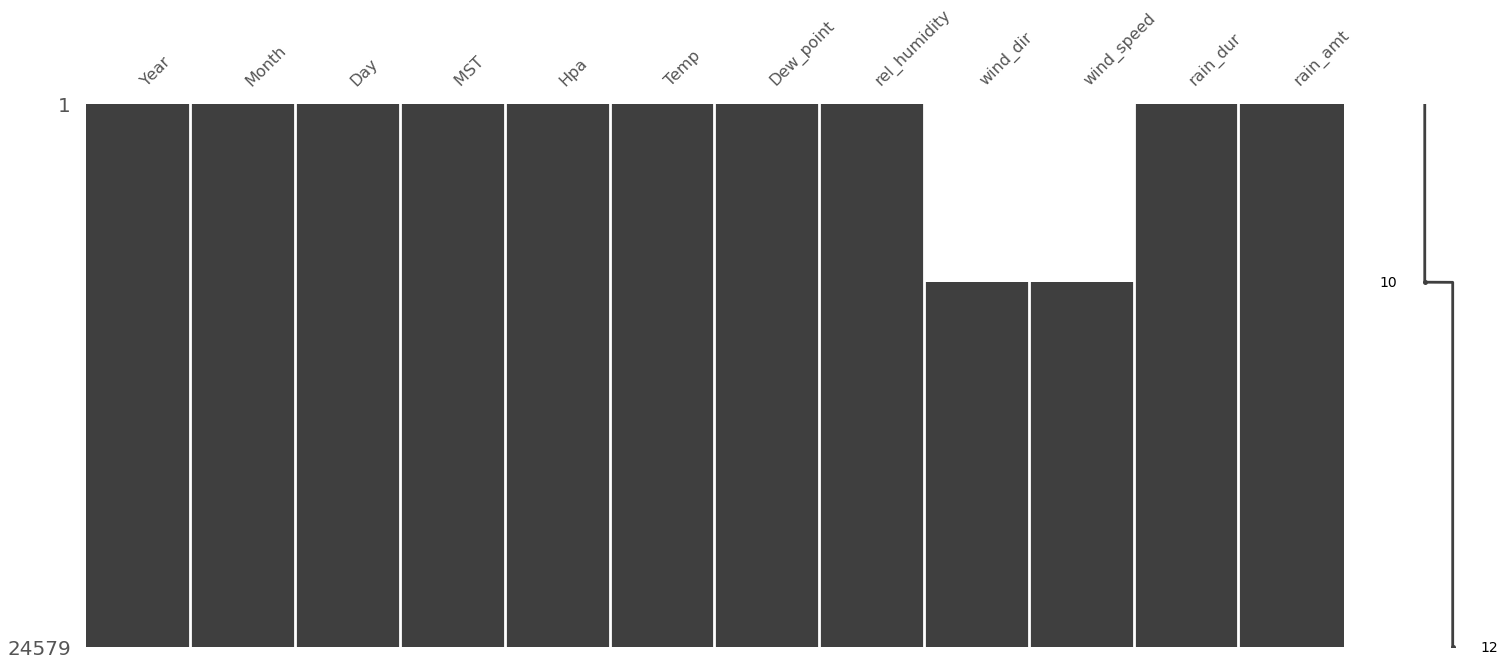

In [258]:
# visualize missing data
msno.matrix(df)

## Do the missingness of values in one column affect the missing data behaviour in another?
Check the Correlation of missing values amongst columns

A high correlation would mean the missingness of values in one column is related to the missingness of values in another column. This can sometimes help gain more insights as to why two are more columns may be missing together and formulate a suitable tactic to handle it.

<AxesSubplot:>

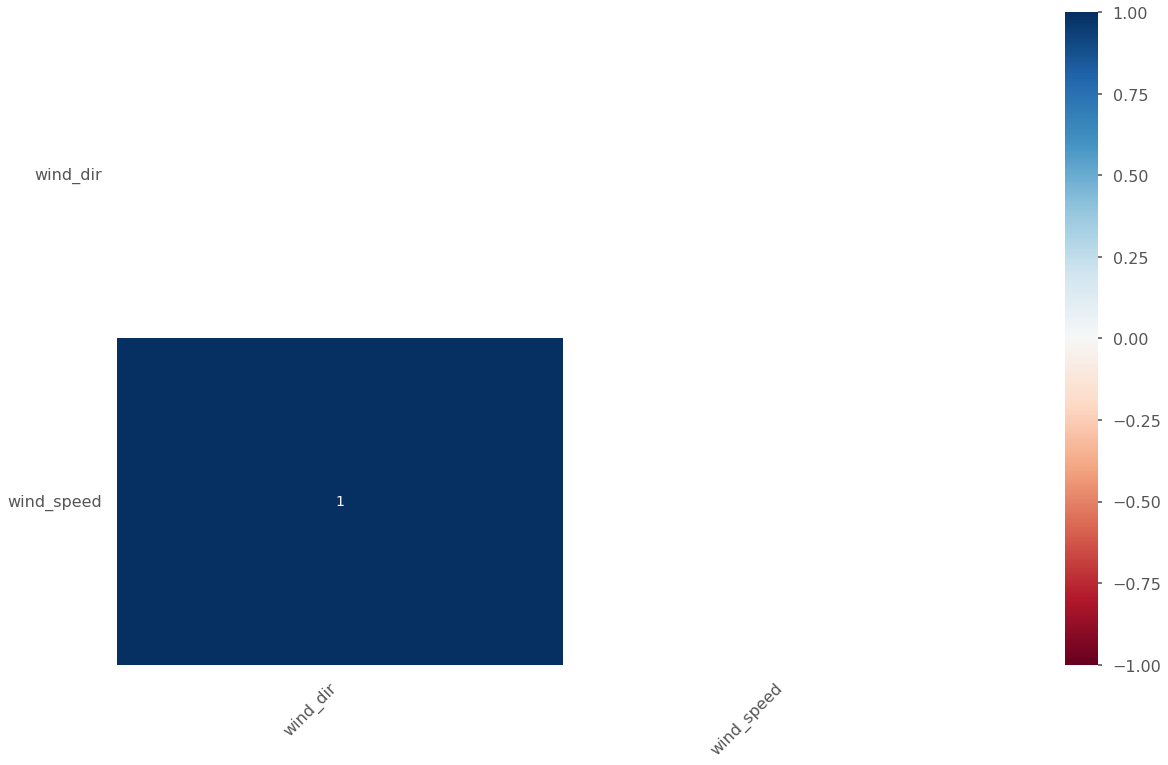

In [259]:
msno.heatmap(df)

## How to impute missing values?
When imputing with missing values, broadly you have two approaches.

Impute with a constant number
For numeric data:
- Mean of entire column excluding the missing values
- Median of entire column excluding the missing values
- Mean or median of only those rows (of the variable) that has the same value of Y as the missing.

For categorical data:
- Fill it with the most frequent data (mode)

Predict the missing value with machine learning using other non-missing columns as predictors.

#### Before we start imputing, let’s quickly look at the DataFrameSummary from DataTile to get a sense of the missing data


In [196]:
!pip install datatile 

Defaulting to user installation because normal site-packages is not writeable


In [260]:
# Exhaustive Summary of dataframe 
from datatile.summary.df import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats

Year    Month      Day     MST       Hpa     Temp Dew_point  \
counts          24579    24579    24579    24579    24579    24579     24579   
uniques             3       12       31       24      143      200       142   
missing             0        0        0        0        0        0         0   
missing_perc       0%       0%       0%       0%       0%       0%        0%   
types         numeric  numeric  numeric  numeric  numeric  numeric   numeric   

             rel_humidity wind_dir wind_speed rain_dur rain_amt  
counts              24579    16503      16503    24579    24579  
uniques                77       38         38       62      207  
missing                 0     8076       8076        0        0  
missing_perc           0%   32.86%     32.86%       0%       0%  
types             numeric  numeric    numeric  numeric  numeric

## Dealing with Missing values
We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0.

Specifically, the following columns have an invalid zero minimum and negative value:

1: Hpa

2: Dew Point

3: Relative Humidity

4: Wind Direction

5: Wind Speed

6: Rain Duration

7: Temperature

8: Rain Amount

In [261]:
df.columns

Index(['Year', 'Month', 'Day', 'MST ', 'Hpa', 'Temp', 'Dew_point',
       'rel_humidity', 'wind_dir', 'wind_speed', 'rain_dur', 'rain_amt'],
      dtype='object')

In [340]:
# mark missing values values as NaN
from numpy import nan
#df[['Hpa', 'Temp', 'Dew_point','rel_humidity', 'wind_dir', 'wind_speed']] = df_with_missing_values[['Hpa', 'Temp', 'Dew_point','rel_humidity', 'wind_dir', 'wind_speed']].replace(0, nan)

df.fillna({'Year': np.nan, 'Month': np.nan, 'Day': np.nan, 'MST ': np.nan, 'Hpa': np.nan, 'Temp': np.nan, 'Dew_point': np.nan,
       'rel_humidity': np.nan, 'wind_dir': np.nan, 'wind_speed':np.nan, 'rain_dur': np.nan, 'rain_amt': np.nan}, inplace=True)

In [341]:
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0            92       NaN   
1  2012      1    1     2  1014.5  24.3       23.0            93       NaN   
2  2012      1    1     3  1013.7  23.8       23.2            96       NaN   
3  2012      1    1     4  1012.9  23.6       23.1            97       NaN   
4  2012      1    1     5  1013.3  23.5       23.1            98       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN         0       0.0  
1         NaN         0       0.0  
2         NaN        57       1.8  
3         NaN        60       4.3  
4         NaN        60       9.8

In [342]:
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20 -1.1  -1.1       -1.1            -1      -1.0   
24575  2014     12   31    21 -1.1  -1.1       -1.1            -1      -1.0   
24576  2014     12   31    22 -1.1  -1.1       -1.1            -1      -1.0   
24577  2014     12   31    23 -1.1  -1.1       -1.1            -1      -1.0   
24578  2014     12   31    24 -1.1  -1.1       -1.1            -1      -1.0   

       wind_speed  rain_dur  rain_amt  
24574        -1.1        -1      -1.1  
24575        -1.1        -1      -1.1  
24576        -1.1        -1      -1.1  
24577        -1.1        -1      -1.1  
24578        -1.1        -1      -1.1

In [343]:
df.isna().tail()

Year  Month    Day   MST     Hpa   Temp  Dew_point  rel_humidity  \
24574  False  False  False  False  False  False      False         False   
24575  False  False  False  False  False  False      False         False   
24576  False  False  False  False  False  False      False         False   
24577  False  False  False  False  False  False      False         False   
24578  False  False  False  False  False  False      False         False   

       wind_dir  wind_speed  rain_dur  rain_amt  
24574     False       False     False     False  
24575     False       False     False     False  
24576     False       False     False     False  
24577     False       False     False     False  
24578     False       False     False     False

In [344]:
# count the number of nan values in each column
print(df.isna().sum())

Year               0
Month              0
Day                0
MST                0
Hpa                0
Temp               0
Dew_point          0
rel_humidity       0
wind_dir        8076
wind_speed      8076
rain_dur           0
rain_amt           0
dtype: int64


In [345]:
# Replace all occurrences of negative values with NaN
df.replace(to_replace= [-1, -1.1], value = np.nan, inplace=True)
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0          92.0       NaN   
1  2012      1    1     2  1014.5  24.3       23.0          93.0       NaN   
2  2012      1    1     3  1013.7  23.8       23.2          96.0       NaN   
3  2012      1    1     4  1012.9  23.6       23.1          97.0       NaN   
4  2012      1    1     5  1013.3  23.5       23.1          98.0       NaN   

   wind_speed  rain_dur  rain_amt  
0         NaN       0.0       0.0  
1         NaN       0.0       0.0  
2         NaN      57.0       1.8  
3         NaN      60.0       4.3  
4         NaN      60.0       9.8

In [346]:
df.tail()

Year  Month  Day  MST   Hpa  Temp  Dew_point  rel_humidity  wind_dir  \
24574  2014     12   31    20  NaN   NaN        NaN           NaN       NaN   
24575  2014     12   31    21  NaN   NaN        NaN           NaN       NaN   
24576  2014     12   31    22  NaN   NaN        NaN           NaN       NaN   
24577  2014     12   31    23  NaN   NaN        NaN           NaN       NaN   
24578  2014     12   31    24  NaN   NaN        NaN           NaN       NaN   

       wind_speed  rain_dur  rain_amt  
24574         NaN       NaN       NaN  
24575         NaN       NaN       NaN  
24576         NaN       NaN       NaN  
24577         NaN       NaN       NaN  
24578         NaN       NaN       NaN

In [347]:
# no missing values, now filled with NaN
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']

df[df[numerical_columns] < 0].count() # to deal with int to str conversion problem

Year            0
Month           0
Day             0
MST             0
Hpa             0
Temp            0
Dew_point       0
rel_humidity    0
wind_dir        0
wind_speed      0
rain_dur        0
rain_amt        0
dtype: int64

In [348]:
df.isna().sum()

Year                0
Month               0
Day                 0
MST                 0
Hpa              3047
Temp             3047
Dew_point        3047
rel_humidity     3047
wind_dir        10725
wind_speed      10725
rain_dur         2707
rain_amt         2707
dtype: int64

In [353]:
# fill NAN with the mean of each columns
df.fillna(df.mean(), inplace = True)

In [354]:
df.head()

Year  Month  Day  MST      Hpa  Temp  Dew_point  rel_humidity    wind_dir  \
0  2012      1    1     1  1014.9  24.4       23.0          92.0  146.457341   
1  2012      1    1     2  1014.5  24.3       23.0          93.0  146.457341   
2  2012      1    1     3  1013.7  23.8       23.2          96.0  146.457341   
3  2012      1    1     4  1012.9  23.6       23.1          97.0  146.457341   
4  2012      1    1     5  1013.3  23.5       23.1          98.0  146.457341   

   wind_speed  rain_dur  rain_amt  
0    0.807738       0.0       0.0  
1    0.807738       0.0       0.0  
2    0.807738      57.0       1.8  
3    0.807738      60.0       4.3  
4    0.807738      60.0       9.8

In [355]:
df.tail()

Year  Month  Day  MST           Hpa       Temp  Dew_point  \
24574  2014     12   31    20  1012.924067  26.518521  22.867764   
24575  2014     12   31    21  1012.924067  26.518521  22.867764   
24576  2014     12   31    22  1012.924067  26.518521  22.867764   
24577  2014     12   31    23  1012.924067  26.518521  22.867764   
24578  2014     12   31    24  1012.924067  26.518521  22.867764   

       rel_humidity    wind_dir  wind_speed  rain_dur  rain_amt  
24574     82.459038  146.457341    0.807738  2.192849  0.284213  
24575     82.459038  146.457341    0.807738  2.192849  0.284213  
24576     82.459038  146.457341    0.807738  2.192849  0.284213  
24577     82.459038  146.457341    0.807738  2.192849  0.284213  
24578     82.459038  146.457341    0.807738  2.192849  0.284213

## Exploratory Data Analysis And Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- checking a feature of the dataset and its visuals

In [356]:
# Descriptive statistical analysis of atmospheric presure(Hpa) 
df['Hpa'].describe()

count    24579.000000
mean      1012.924067
std          1.964955
min       1005.200000
25%       1011.800000
50%       1012.924067
75%       1014.200000
max       1020.000000
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Hpa'>

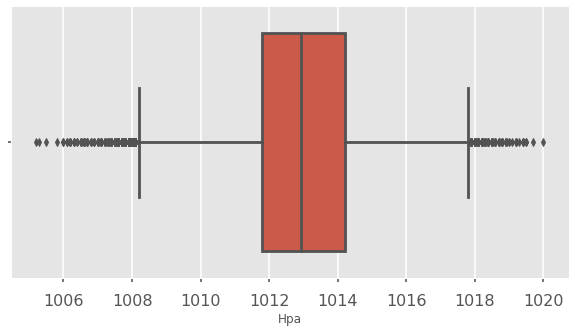

In [368]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = df, x = 'Hpa')

<AxesSubplot:xlabel='Hpa', ylabel='Count'>

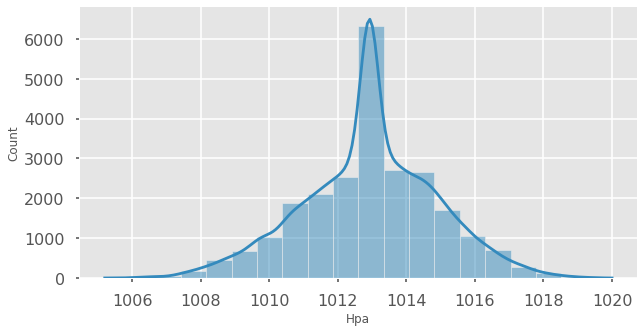

In [398]:
# creating an histogram plot
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = df, x= 'Hpa', bins=20, kde=True)

In [366]:
# Descriptive statistical analysis for temperature(Temp) 
df['Temp'].describe()

count    24579.000000
mean        26.518521
std          3.269049
min         15.300000
25%         24.000000
50%         26.100000
75%         28.600000
max         37.000000
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Temp'>

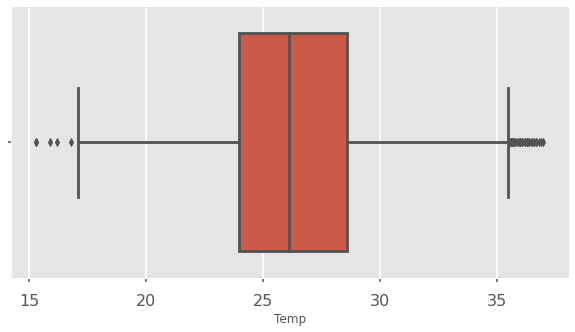

In [369]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = df, x = 'Temp')

<AxesSubplot:xlabel='Temp', ylabel='Count'>

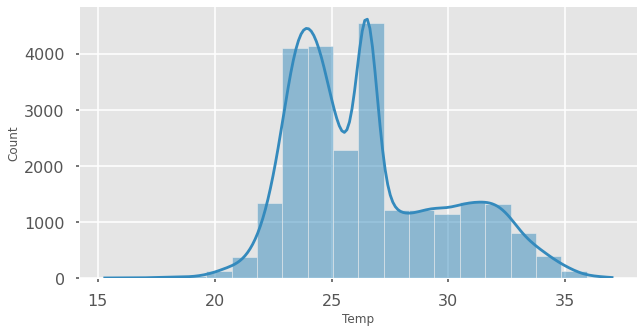

In [399]:
# creating an histogram plot
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = df, x= 'Temp', bins=20, kde=True)

In [375]:
# Descriptive statistical analysis for relative humidity(rel_humidity) 
df['rel_humidity'].describe()

count    24579.000000
mean        82.459038
std         15.161413
min         25.000000
25%         73.000000
50%         85.000000
75%         96.000000
max        100.000000
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='rel_humidity'>

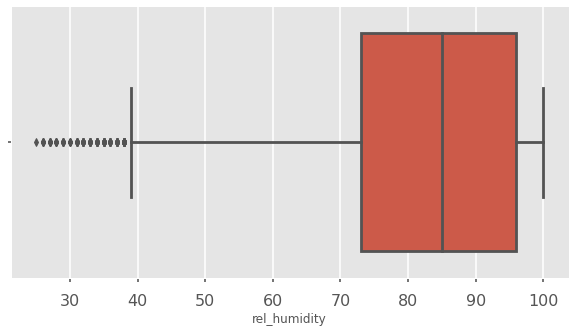

In [376]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = df, x = 'rel_humidity')

<AxesSubplot:xlabel='rel_humidity', ylabel='Count'>

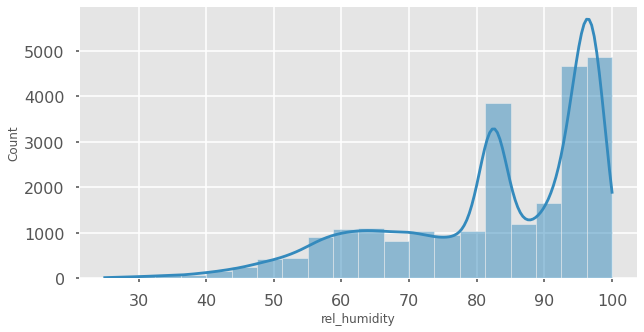

In [400]:
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = df, x= 'rel_humidity', bins = 20, kde=True)

In [401]:
# Descriptive statistical analysis for wind speed(wind_speed) 
df['wind_speed'].describe()

count    24579.000000
mean         0.807738
std          0.441760
min          0.000000
25%          0.600000
50%          0.807738
75%          0.807738
max         13.200000
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='wind_speed'>

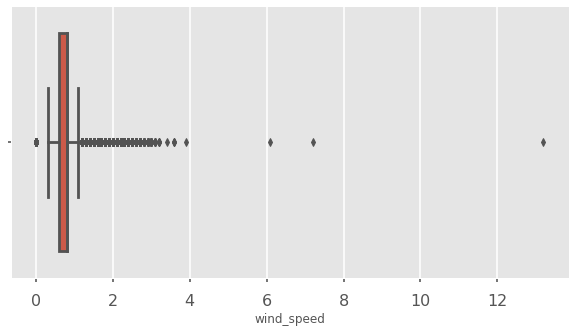

In [402]:
fig = plt.figure(figsize =(10, 5))

# Creating a Boxplot
sns.boxplot(data = df, x = 'wind_speed')

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

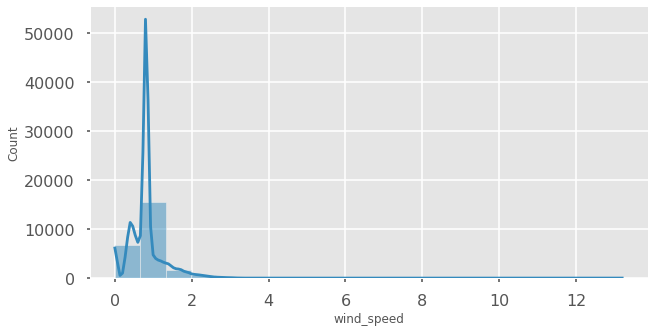

In [403]:
fig = plt.figure(figsize =(10, 5))
sns.histplot(data = df, x= 'wind_speed', bins = 20, kde=True)

### Bivariate Analysis
- comparing two features or variables and their visuals.

In [414]:
# Average Hpa by year
hpa_yr = df['Hpa'].groupby(df.Year).mean()
hpa_yr

Year
2012    1012.720344
2013    1012.883803
2014    1013.181949
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Hpa'>

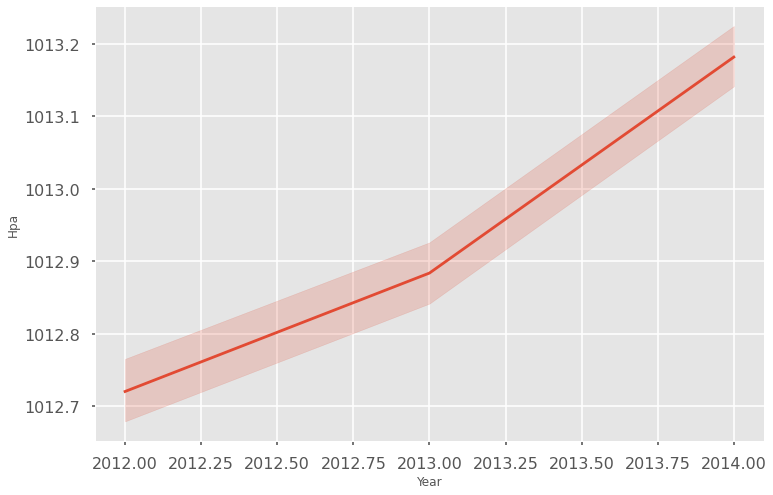

In [415]:
# visualizing Hpa by Year
sns.lineplot(data = df, x = "Year", y = "Hpa")

In [421]:
# average Hpa by Month
df['Hpa'].groupby(df.Month).mean()

Month
1     1014.319505
2     1012.933295
3     1013.224936
4     1012.714614
5     1012.281381
6     1011.312721
7     1012.404903
8     1012.940998
9     1013.361723
10    1013.616131
11    1012.824334
12    1012.970185
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Hpa'>

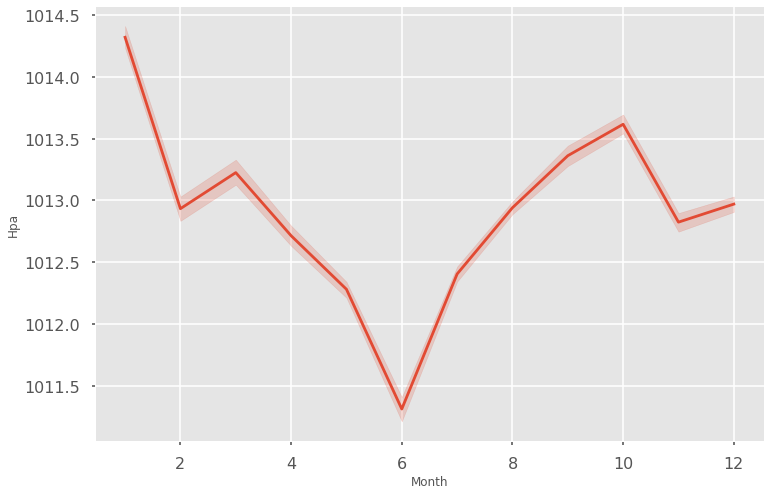

In [419]:
# Visualizing average Hpa by Month
sns.lineplot(data= df, x="Month", y="Hpa")

In [446]:
# average Hpa by Day
df['Hpa'].groupby(df.Day).mean().sort_values()

Day
14    1012.782821
9     1012.782889
15    1012.836212
3     1012.840857
22    1012.842651
12    1012.849431
4     1012.857205
17    1012.859049
23    1012.859131
30    1012.859239
11    1012.865741
1     1012.867136
16    1012.873138
7     1012.877096
2     1012.878722
13    1012.886508
10    1012.907465
8     1012.907945
5     1012.918558
21    1012.943304
18    1012.953642
19    1012.967508
25    1012.973283
24    1012.990142
6     1012.998325
26    1013.015459
29    1013.032003
31    1013.045846
20    1013.098292
28    1013.145078
27    1013.162219
Name: Hpa, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Hpa'>

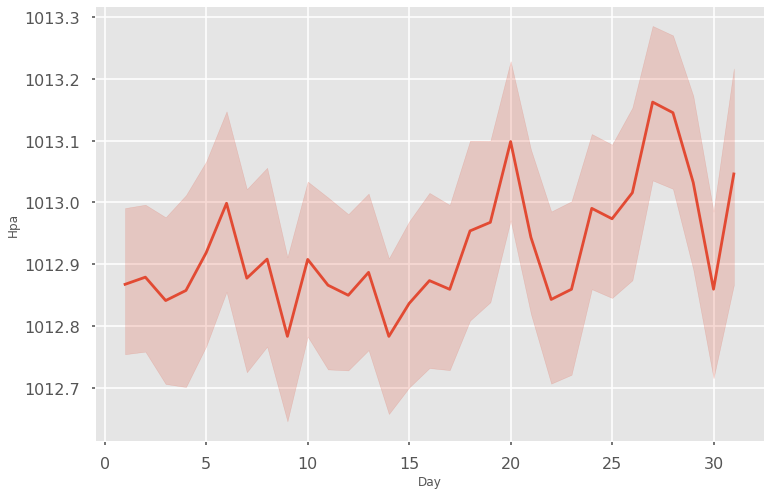

In [423]:
# Visualizing average Hpa by Day
sns.lineplot(data= df, x="Day", y="Hpa")

In [438]:
# Pivot the dataframe to a wide-form representation:
df_wide = pd.pivot_table(df, index = "Year", columns = "Month", values = "Hpa")
df_wide.head()

Month           1            2            3            4            5   \
Year                                                                     
2012   1013.109710  1012.044961  1012.638575  1012.819200  1011.881586   
2013   1014.401904  1013.175507  1013.283244  1012.134365  1012.362289   
2014   1015.447344  1013.609821  1013.752989  1013.190278  1012.600269   

Month           6            7            8            9            10  \
Year                                                                     
2012   1011.272711  1012.285603  1013.170811  1013.706103  1013.354523   
2013   1011.259167  1012.086323  1012.728898  1013.121734  1014.254570   
2014   1011.377222  1012.842783  1012.924067  1012.924067  1012.924067   

Month           11           12  
Year                             
2012   1012.709984  1012.688904  
2013   1012.393256  1013.356038  
2014   1013.363826  1012.860914

<AxesSubplot:xlabel='Year', ylabel='5'>

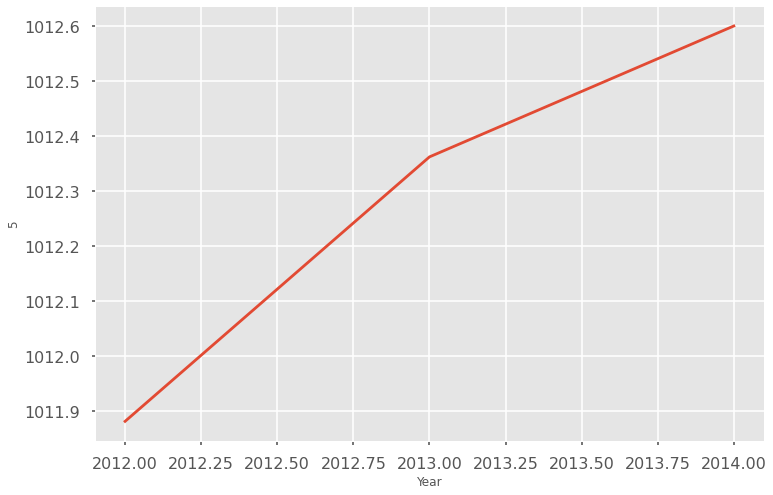

In [440]:
# checking the trend in May
sns.lineplot(data=df_wide[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

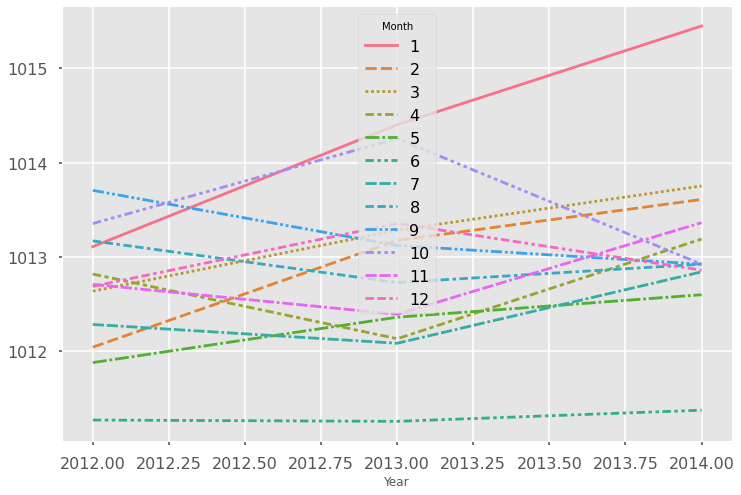

In [445]:
# plots a separate line for each month:
sns.lineplot(data=df_wide, legend='auto')

In [467]:
# Hpa by temp
df['Hpa'].groupby(df.Temp).mean().sort_values()

Temp
37.0    1007.300000
36.9    1008.500000
36.3    1008.750000
36.2    1008.925000
36.6    1009.000000
           ...     
19.8    1015.340000
19.9    1015.357143
20.3    1015.430435
20.6    1015.546667
19.1    1016.600000
Name: Hpa, Length: 200, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='Temp'>

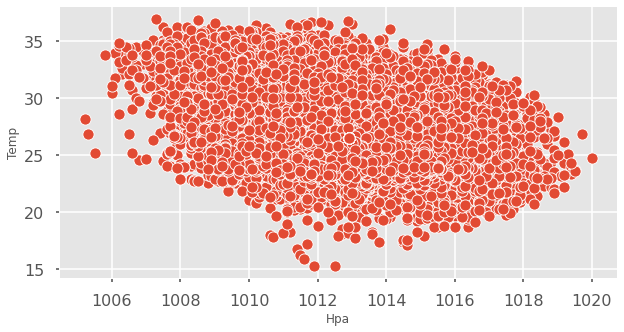

In [459]:
# scatter plot of atmospheric pressure by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= df, x="Hpa", y="Temp")

<AxesSubplot:xlabel='Hpa', ylabel='Temp'>

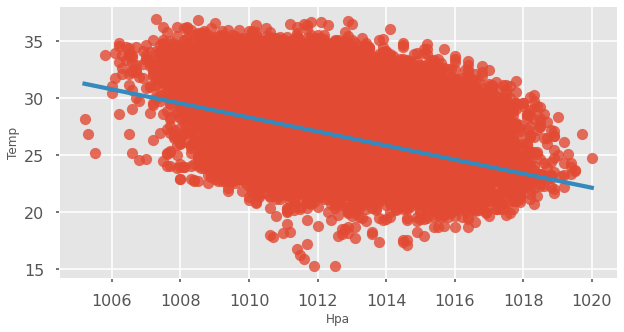

In [461]:
# regression plot of atmospheric pressure by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= df, x="Hpa", y="Temp", line_kws={"color": "C1"})

In [469]:
# Hpa by relative humidity
df['rel_humidity'].groupby(df.Hpa).mean().sort_values()

Hpa
1005.8    46.000000
1006.3    50.666667
1006.1    55.500000
1006.9    58.333333
1007.1    58.857143
            ...    
1013.5    87.007614
1013.6    87.112500
1014.4    87.331325
1005.3    88.000000
1005.5    93.000000
Name: rel_humidity, Length: 143, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='rel_humidity'>

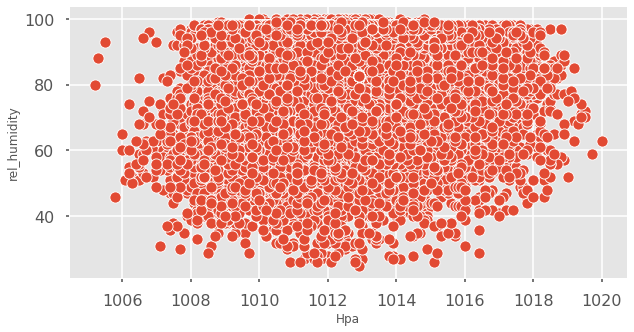

In [472]:
# scatter plot of atmospheric pressure by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= df, x="Hpa", y="rel_humidity")

<AxesSubplot:xlabel='Hpa', ylabel='rel_humidity'>

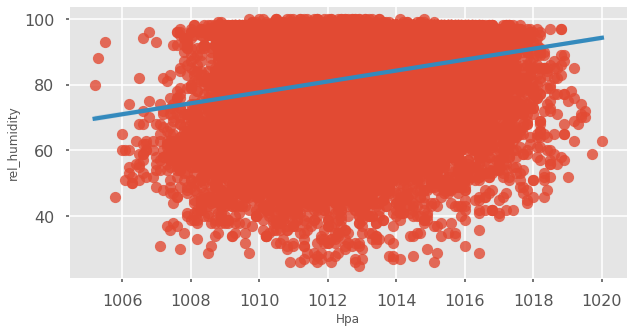

In [473]:
# regression plot of atmospheric pressure by relative humidity
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= df, x="Hpa", y="rel_humidity", line_kws={"color": "C1"})

In [475]:
# Hpa by wind speed
df['wind_speed'].groupby(df.Hpa).mean().sort_values()

Hpa
1014.9    0.718673
1015.9    0.738326
1013.6    0.743960
1013.4    0.747278
1014.4    0.753005
            ...   
1019.0    1.600000
1019.2    1.825000
1019.7    2.000000
1019.3    2.000000
1020.0    2.400000
Name: wind_speed, Length: 143, dtype: float64

<AxesSubplot:xlabel='Hpa', ylabel='wind_speed'>

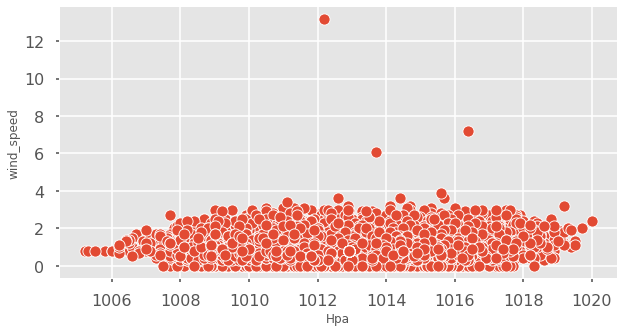

In [476]:
# scatter plot of atmospheric pressure by wind speed
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= df, x="Hpa", y="wind_speed")

<AxesSubplot:xlabel='Hpa', ylabel='wind_speed'>

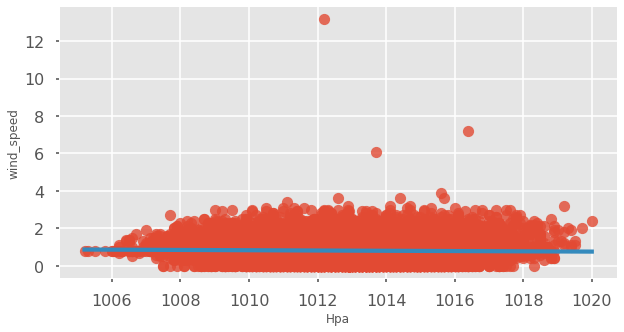

In [478]:
# regression plot of atmospheric pressure by wind speed
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= df, x="Hpa", y="wind_speed", line_kws={"color": "C1"})

In [481]:
# Average temperature by year
temp_yr = round(df['Temp'].groupby(df.Year).mean(), 2)
temp_yr

Year
2012    26.17
2013    26.60
2014    26.79
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Temp'>

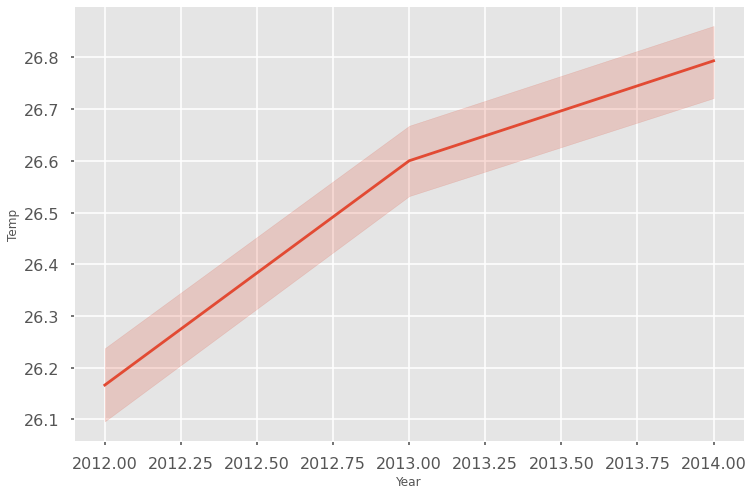

In [483]:
# visualizing Temp by Year
sns.lineplot(data = df, x = "Year", y = "Temp")

In [485]:
# average Temperature by Month
round(df['Temp'].groupby(df.Month).mean(), 2)

Month
1     25.67
2     26.47
3     27.25
4     27.36
5     27.29
6     27.27
7     26.35
8     26.46
9     25.95
10    25.93
11    26.16
12    25.97
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Temp'>

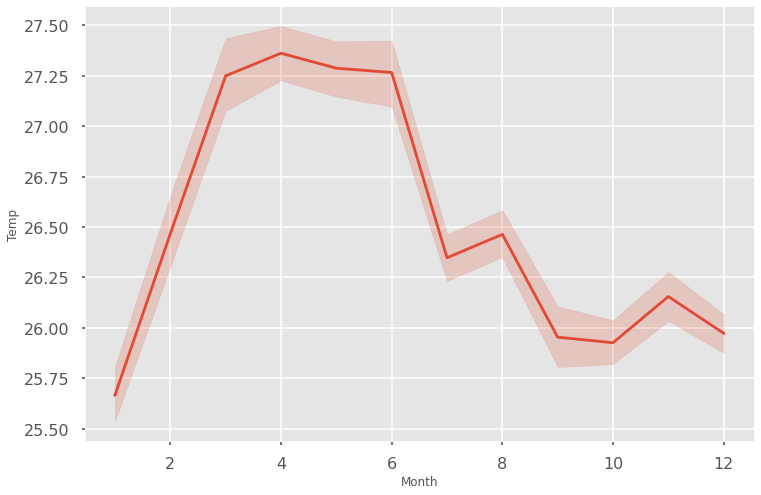

In [486]:
# visualizing Temp by Month
sns.lineplot(data = df, x = "Month", y = "Temp")

In [489]:
# average Temperature by Day
round(df['Temp'].groupby(df.Day).mean(), 2)

Day
1     26.37
2     26.43
3     26.42
4     26.42
5     26.45
6     26.32
7     26.55
8     26.48
9     26.51
10    26.25
11    26.61
12    26.44
13    26.56
14    26.68
15    26.68
16    26.45
17    26.42
18    26.48
19    26.66
20    26.61
21    26.50
22    26.71
23    26.76
24    26.51
25    26.57
26    26.60
27    26.64
28    26.48
29    26.39
30    26.66
31    26.43
Name: Temp, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Temp'>

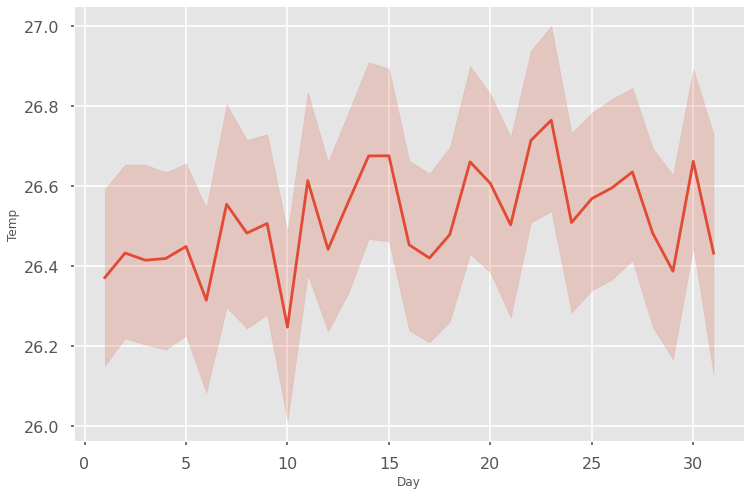

In [490]:
# Visualizing average Temperature by Day
sns.lineplot(data= df, x="Day", y="Temp")

In [492]:
# Pivot the dataframe to a wide-form representation:
df_wide1 = pd.pivot_table(df, index = "Year", columns = "Month", values = "Temp")
df_wide1.head()

Month         1          2          3          4          5          6   \
Year                                                                      
2012   25.569111  26.580773  26.492876  26.653915  26.904032  26.492987   
2013   26.005696  26.127954  27.441039  28.060016  27.523671  27.163750   
2014   25.427982  26.687202  27.815751  27.371806  27.435618  27.580833   

Month         7          8          9          10         11         12  
Year                                                                     
2012   25.969654  26.404595  25.604695  25.846209  26.102716  25.567354  
2013   26.430804  26.470027  26.179635  25.682527  26.235432  25.872108  
2014   26.643143  26.518521  26.518521  26.518521  26.121218  26.503909

<AxesSubplot:xlabel='Year', ylabel='5'>

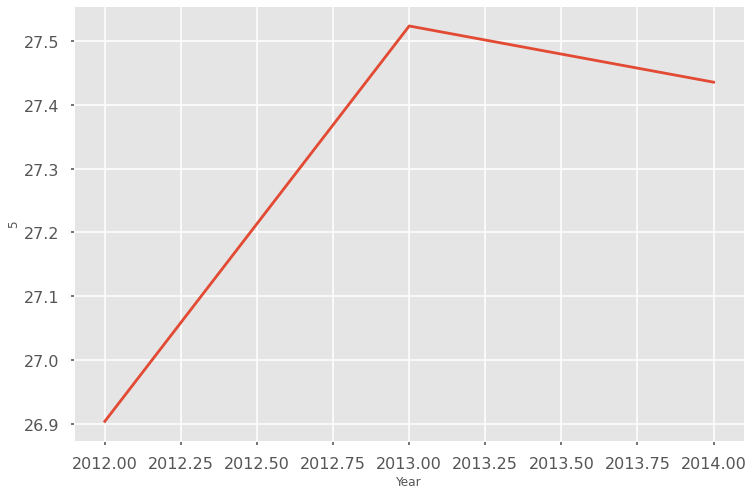

In [493]:
# checking the trend in May
sns.lineplot(data=df_wide1[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

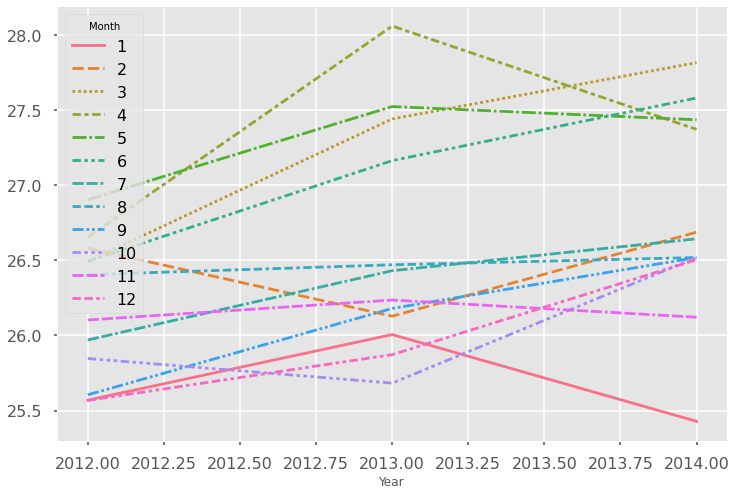

In [494]:
# plots a separate line for each month:
sns.lineplot(data=df_wide1, legend='auto')

In [496]:
# Temp by relative humidity
round(df['rel_humidity'].groupby(df.Temp).mean().sort_values(), 2)

Temp
36.8    25.00
36.7    26.50
36.5    27.67
36.9    29.00
36.4    29.67
        ...  
18.2    97.50
16.2    98.00
15.9    98.00
16.8    98.00
15.3    98.00
Name: rel_humidity, Length: 200, dtype: float64

<AxesSubplot:xlabel='rel_humidity', ylabel='Temp'>

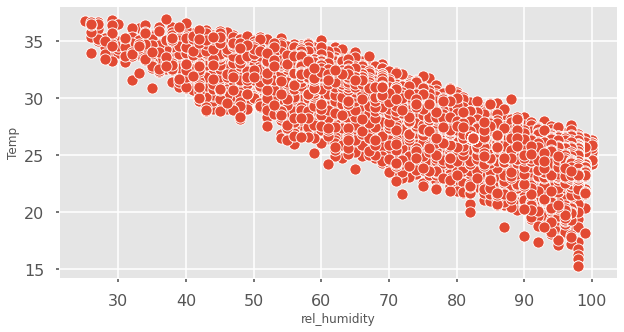

In [497]:
# scatter plot of relative humidity by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= df, x="rel_humidity", y="Temp")

<AxesSubplot:xlabel='rel_humidity', ylabel='Temp'>

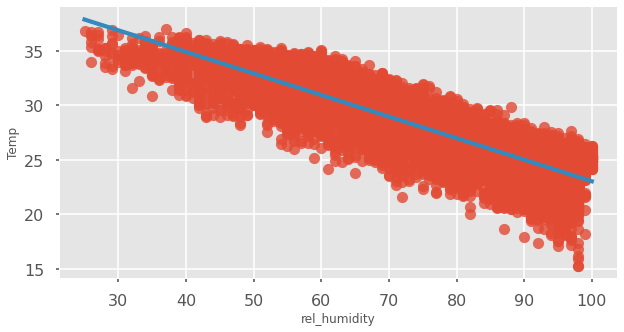

In [498]:
# regression plot of relative humidity by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= df, x="rel_humidity", y="Temp", line_kws={"color": "C1"})

In [499]:
# Temp by wind speed
round(df['wind_speed'].groupby(df.Temp).mean().sort_values(), 2)

Temp
15.9    0.0
16.2    0.0
16.8    0.0
17.2    0.0
18.0    0.0
       ... 
36.4    2.0
36.1    2.1
36.7    2.2
36.6    2.5
36.8    2.8
Name: wind_speed, Length: 200, dtype: float64

<AxesSubplot:xlabel='wind_speed', ylabel='Temp'>

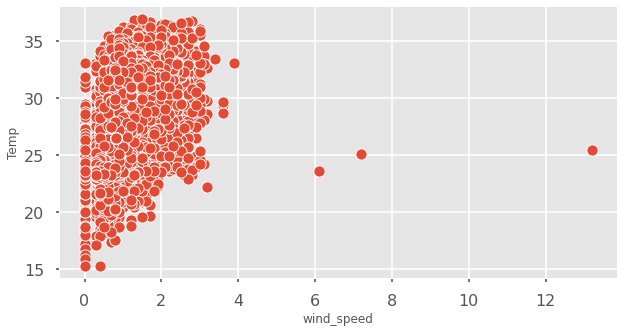

In [500]:
# scatter plot of wind speed by temperature
fig = plt.figure(figsize =(10, 5))
sns.scatterplot(data= df, x="wind_speed", y="Temp")

<AxesSubplot:xlabel='wind_speed', ylabel='Temp'>

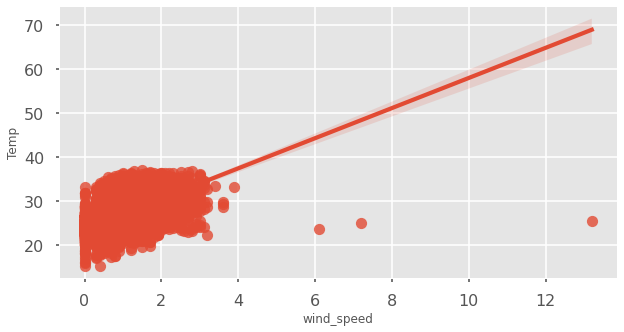

In [501]:
# scatter plot of wind speed by temperature
fig = plt.figure(figsize =(10, 5))
sns.regplot(data= df, x="wind_speed", y="Temp")

In [503]:
# Average relative humidity by year
rel_hum_yr = round(df['rel_humidity'].groupby(df.Year).mean(), 2)
rel_hum_yr

Year
2012    83.93
2013    83.11
2014    80.19
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='rel_humidity'>

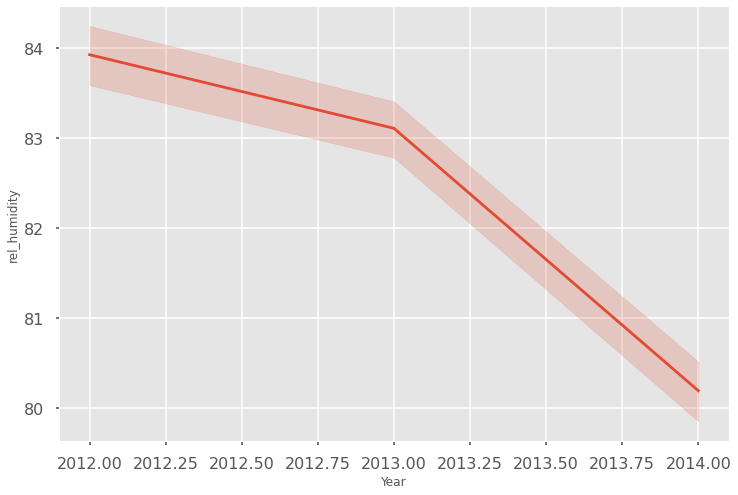

In [504]:
# visualizing Relative humidity by Year
sns.lineplot(data = df, x = "Year", y = "rel_humidity")

In [505]:
# Average relative humidity by Month
rel_hum_yr = round(df['rel_humidity'].groupby(df.Month).mean(), 2)
rel_hum_yr

Month
1     79.17
2     75.53
3     76.30
4     82.53
5     84.03
6     84.44
7     83.83
8     83.31
9     86.13
10    86.05
11    86.35
12    83.92
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='rel_humidity'>

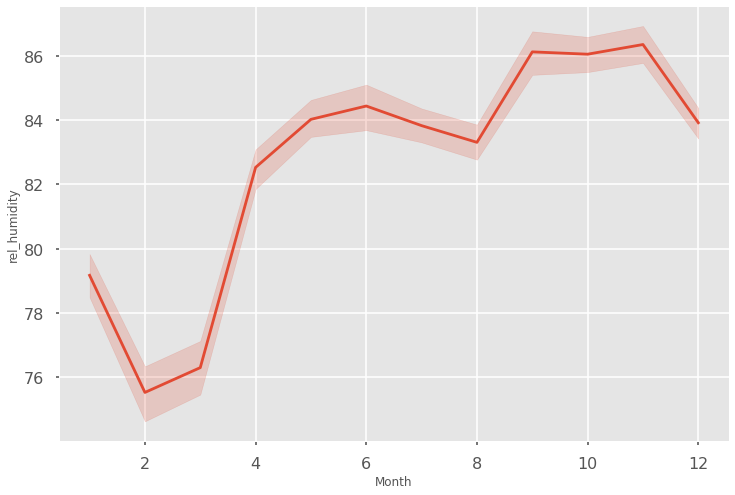

In [506]:
# visualizing Relative humidity by Month
sns.lineplot(data = df, x = "Month", y = "rel_humidity")

In [507]:
# average Relative humidity by Day
round(df['rel_humidity'].groupby(df.Day).mean(), 2)

Day
1     83.48
2     83.43
3     83.60
4     82.71
5     82.56
6     82.47
7     81.93
8     82.55
9     82.04
10    83.41
11    81.95
12    83.19
13    82.18
14    82.11
15    82.33
16    83.21
17    82.99
18    82.87
19    81.45
20    81.39
21    82.21
22    81.77
23    81.34
24    82.42
25    81.95
26    82.11
27    81.84
28    82.24
29    83.41
30    82.51
31    82.62
Name: rel_humidity, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='rel_humidity'>

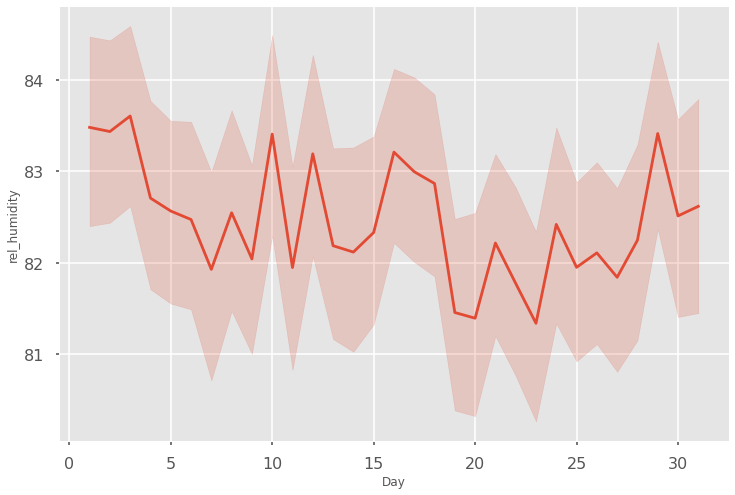

In [508]:
# Visualizing average Temperature by Day
sns.lineplot(data= df, x="Day", y="rel_humidity")

In [509]:
# Pivot the dataframe to a wide-form representation:
df_wide2 = pd.pivot_table(df, index = "Year", columns = "Month", values = "rel_humidity")
df_wide2.head()

Month         1          2          3          4          5          6   \
Year                                                                      
2012   82.358144  78.409954  82.309140  84.095082  84.348118  84.895731   
2013   79.501086  79.102069  77.212719  81.330426  83.666826  84.236111   
2014   75.656531  68.968750  69.374273  82.163889  84.060484  84.519444   

Month         7          8          9          10         11         12  
Year                                                                     
2012   84.487243  82.979730  86.676056  85.826350  85.930342  85.908272  
2013   84.440133  84.465054  86.185997  88.243280  85.763548  82.935043  
2014   82.561031  82.459038  82.459038  82.459038  87.328402  82.869378

<AxesSubplot:xlabel='Year', ylabel='5'>

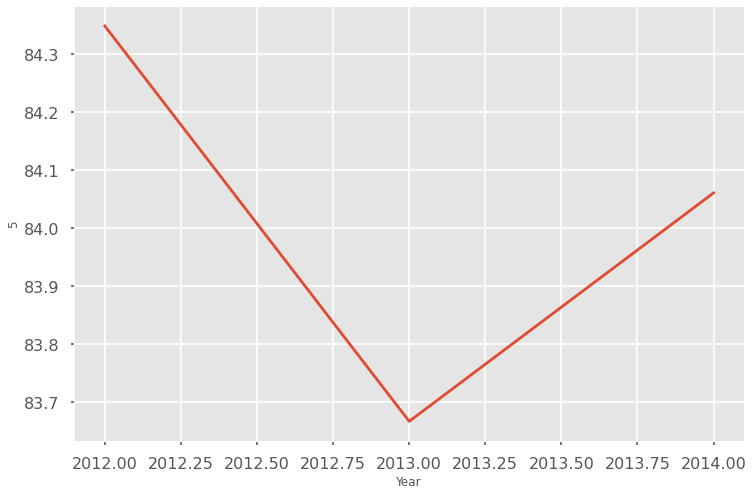

In [510]:
# checking the trend in May
sns.lineplot(data=df_wide2[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

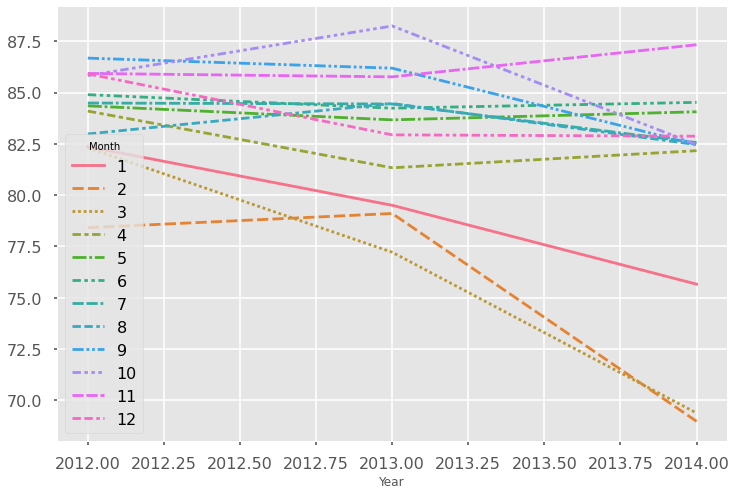

In [511]:
# plots a separate line for each month:
sns.lineplot(data=df_wide2, legend='auto')

In [512]:
# Average wind speed by year
win_speed_yr = round(df['wind_speed'].groupby(df.Year).mean(), 2)
win_speed_yr

Year
2012    0.81
2013    0.75
2014    0.87
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='wind_speed'>

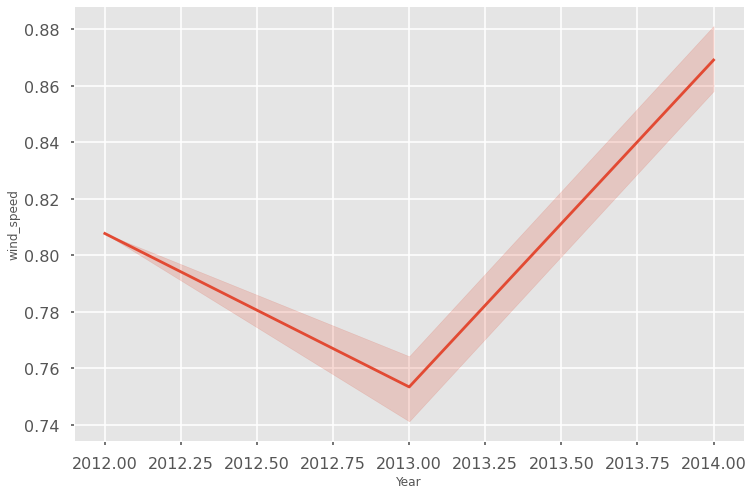

In [513]:
# visualizing wind speed by Year
sns.lineplot(data = df, x = "Year", y = "wind_speed")

In [514]:
# Average wind speed by Month
win_speed_mnth = round(df['wind_speed'].groupby(df.Month).mean(), 2)
win_speed_mnth

Month
1     0.93
2     0.93
3     0.93
4     0.79
5     0.75
6     0.69
7     0.74
8     0.77
9     0.75
10    0.76
11    0.76
12    0.84
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='wind_speed'>

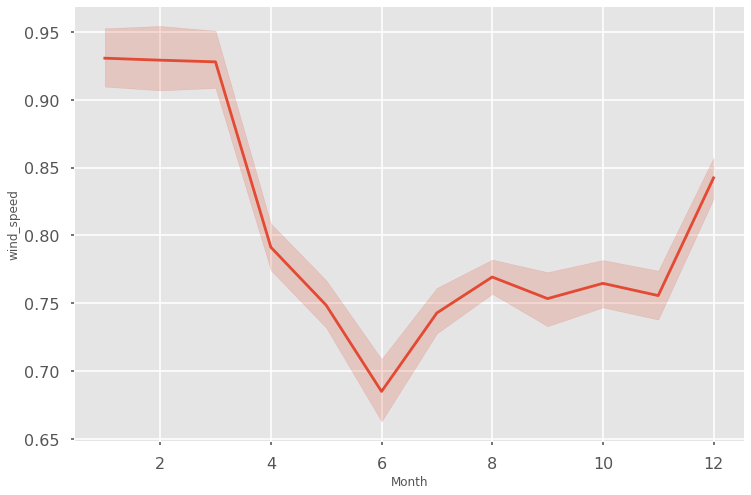

In [515]:
# visualizing wind speed by Month
sns.lineplot(data = df, x = "Month", y = "wind_speed")

In [516]:
# Average wind speed by Day
win_speed_day = round(df['wind_speed'].groupby(df.Day).mean(), 2)
win_speed_day

Day
1     0.81
2     0.80
3     0.76
4     0.82
5     0.80
6     0.81
7     0.78
8     0.79
9     0.81
10    0.81
11    0.84
12    0.81
13    0.80
14    0.81
15    0.80
16    0.79
17    0.79
18    0.81
19    0.82
20    0.82
21    0.81
22    0.81
23    0.80
24    0.79
25    0.81
26    0.84
27    0.83
28    0.82
29    0.79
30    0.82
31    0.84
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='wind_speed'>

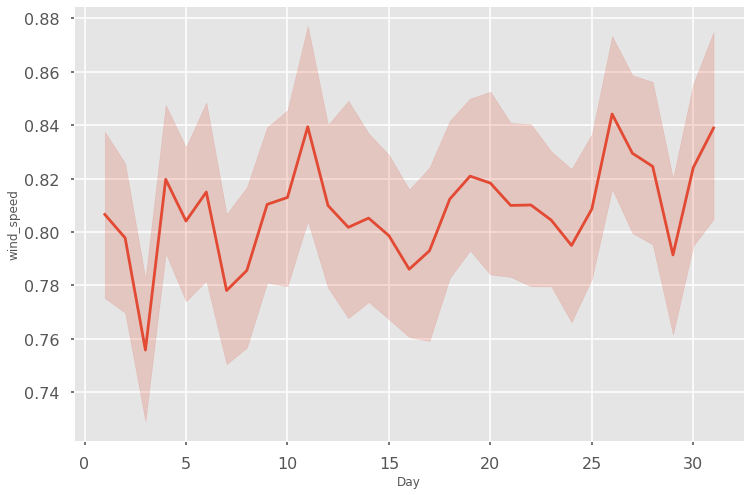

In [517]:
# visualizing wind speed by Day
sns.lineplot(data = df, x = "Day", y = "wind_speed")

In [518]:
# Pivot the dataframe to a wide-form representation:
df_wide3 = pd.pivot_table(df, index = "Year", columns = "Month", values = "wind_speed")
df_wide3.head()

Month        1         2         3         4         5         6         7   \
Year                                                                          
2012   0.807738  0.807738  0.807738  0.807738  0.807738  0.807738  0.807738   
2013   0.864907  0.931216  0.806504  0.768216  0.660962  0.661133  0.627430   
2014   1.118424  1.052232  1.169096  0.798056  0.777151  0.675694  0.793722   

Month        8         9         10        11        12  
Year                                                     
2012   0.807738  0.807738  0.807738  0.807738  0.807738  
2013   0.693952  0.697244  0.698522  0.726592  0.916615  
2014   0.807738  0.807738  0.807738  0.739397  0.800992

<AxesSubplot:xlabel='Year', ylabel='5'>

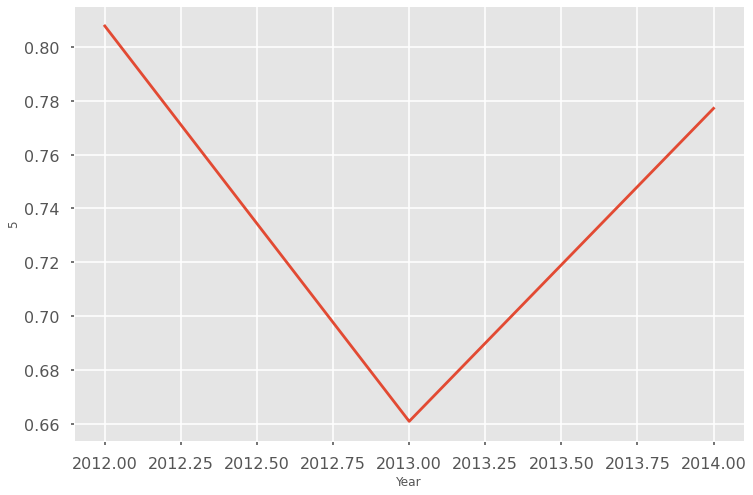

In [522]:
# checking the trend in May
sns.lineplot(data=df_wide3[5]) # 5 ==> May

<AxesSubplot:xlabel='Year'>

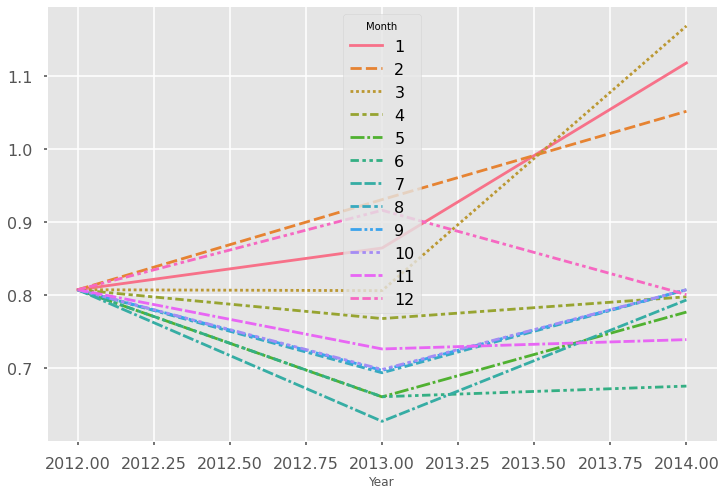

In [523]:
# plots a separate line for each month:
sns.lineplot(data=df_wide3, legend='auto')

### Multivariate Analysis
- it is comparing two or more features or variables and their visuals

In [526]:
# correlation of features
df.corr()

Year     Month       Day      MST        Hpa      Temp  \
Year          1.000000 -0.036475  0.010701 -0.000857  0.094028  0.077166   
Month        -0.036475  1.000000  0.019519 -0.000896 -0.057055 -0.067080   
Day           0.010701  0.019519  1.000000  0.001217  0.027008  0.016659   
MST          -0.000857 -0.000896  0.001217  1.000000 -0.107942  0.306306   
Hpa           0.094028 -0.057055  0.027008 -0.107942  1.000000 -0.370945   
Temp          0.077166 -0.067080  0.016659  0.306306 -0.370945  1.000000   
Dew_point    -0.091771  0.304264 -0.000669  0.091849 -0.267458  0.009645   
rel_humidity -0.098555  0.184155 -0.017176 -0.256803  0.214903 -0.917201   
wind_dir     -0.031097  0.006069 -0.001463  0.045286 -0.145531  0.122265   
wind_speed    0.054633 -0.103013  0.017051  0.128925 -0.032872  0.463043   
rain_dur     -0.027832  0.067348 -0.004632  0.098449  0.004476 -0.141041   
rain_amt     -0.010733  0.037902  0.001575  0.070434 -0.033846 -0.080344   

              Dew_point  rel_humidity  wind_dir  wind_speed  rain_dur  \
Year          -0.091771     -0.098555 -0.031097    0.054633 -0.027832   
Month          0.304264      0.184155  0.006069   -0.103013  0.067348   
Day           -0.000669     -0.017176 -0.001463    0.017051 -0.004632   
MST            0.091849     -0.256803  0.045286    0.128925  0.098449   
Hpa           -0.267458      0.214903 -0.145531   -0.032872  0.004476   
Temp           0.009645     -0.917201  0.122265    0.463043 -0.141041   
Dew_point      1.000000      0.370909  0.178779   -0.295909  0.082987   
rel_humidity   0.370909      1.000000 -0.040957   -0.548075  0.172413   
wind_dir       0.178779     -0.040957  1.000000    0.036382  0.008818   
wind_speed    -0.295909     -0.548075  0.036382    1.000000 -0.004075   
rain_dur       0.082987      0.172413  0.008818   -0.004075  1.000000   
rain_amt       0.051953      0.100590  0.019285    0.036653  0.605963   

              rain_amt  
Year         -0.010733  
Month         0.037902  
Day           0.001575  
MST           0.070434  
Hpa          -0.033846  
Temp         -0.080344  
Dew_point     0.051953  
rel_humidity  0.100590  
wind_dir      0.019285  
wind_speed    0.036653  
rain_dur      0.605963  
rain_amt      1.000000

<AxesSubplot:>

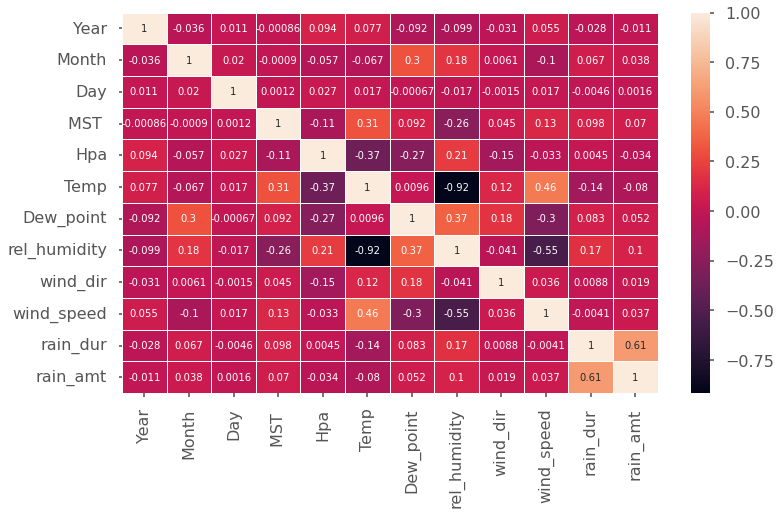

In [527]:
corel = df.corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

<AxesSubplot:>

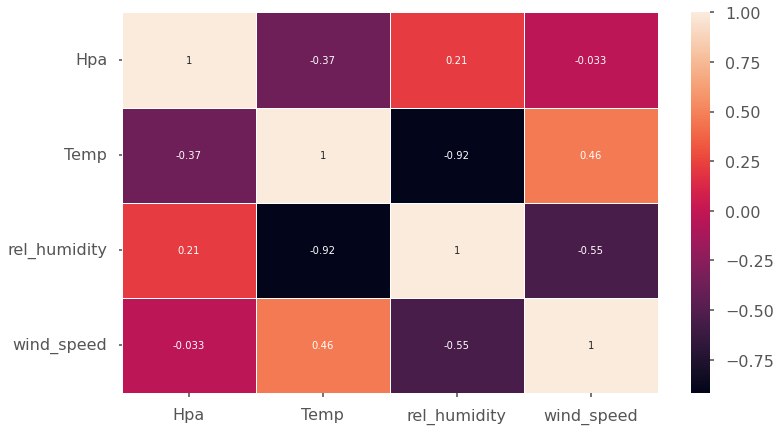

In [529]:
# Correlating the four parameters or features- Hpa, Temp, rel_humidity and wind_speed
corel = df[['Hpa', 'Temp', 'rel_humidity', 'wind_speed']].corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

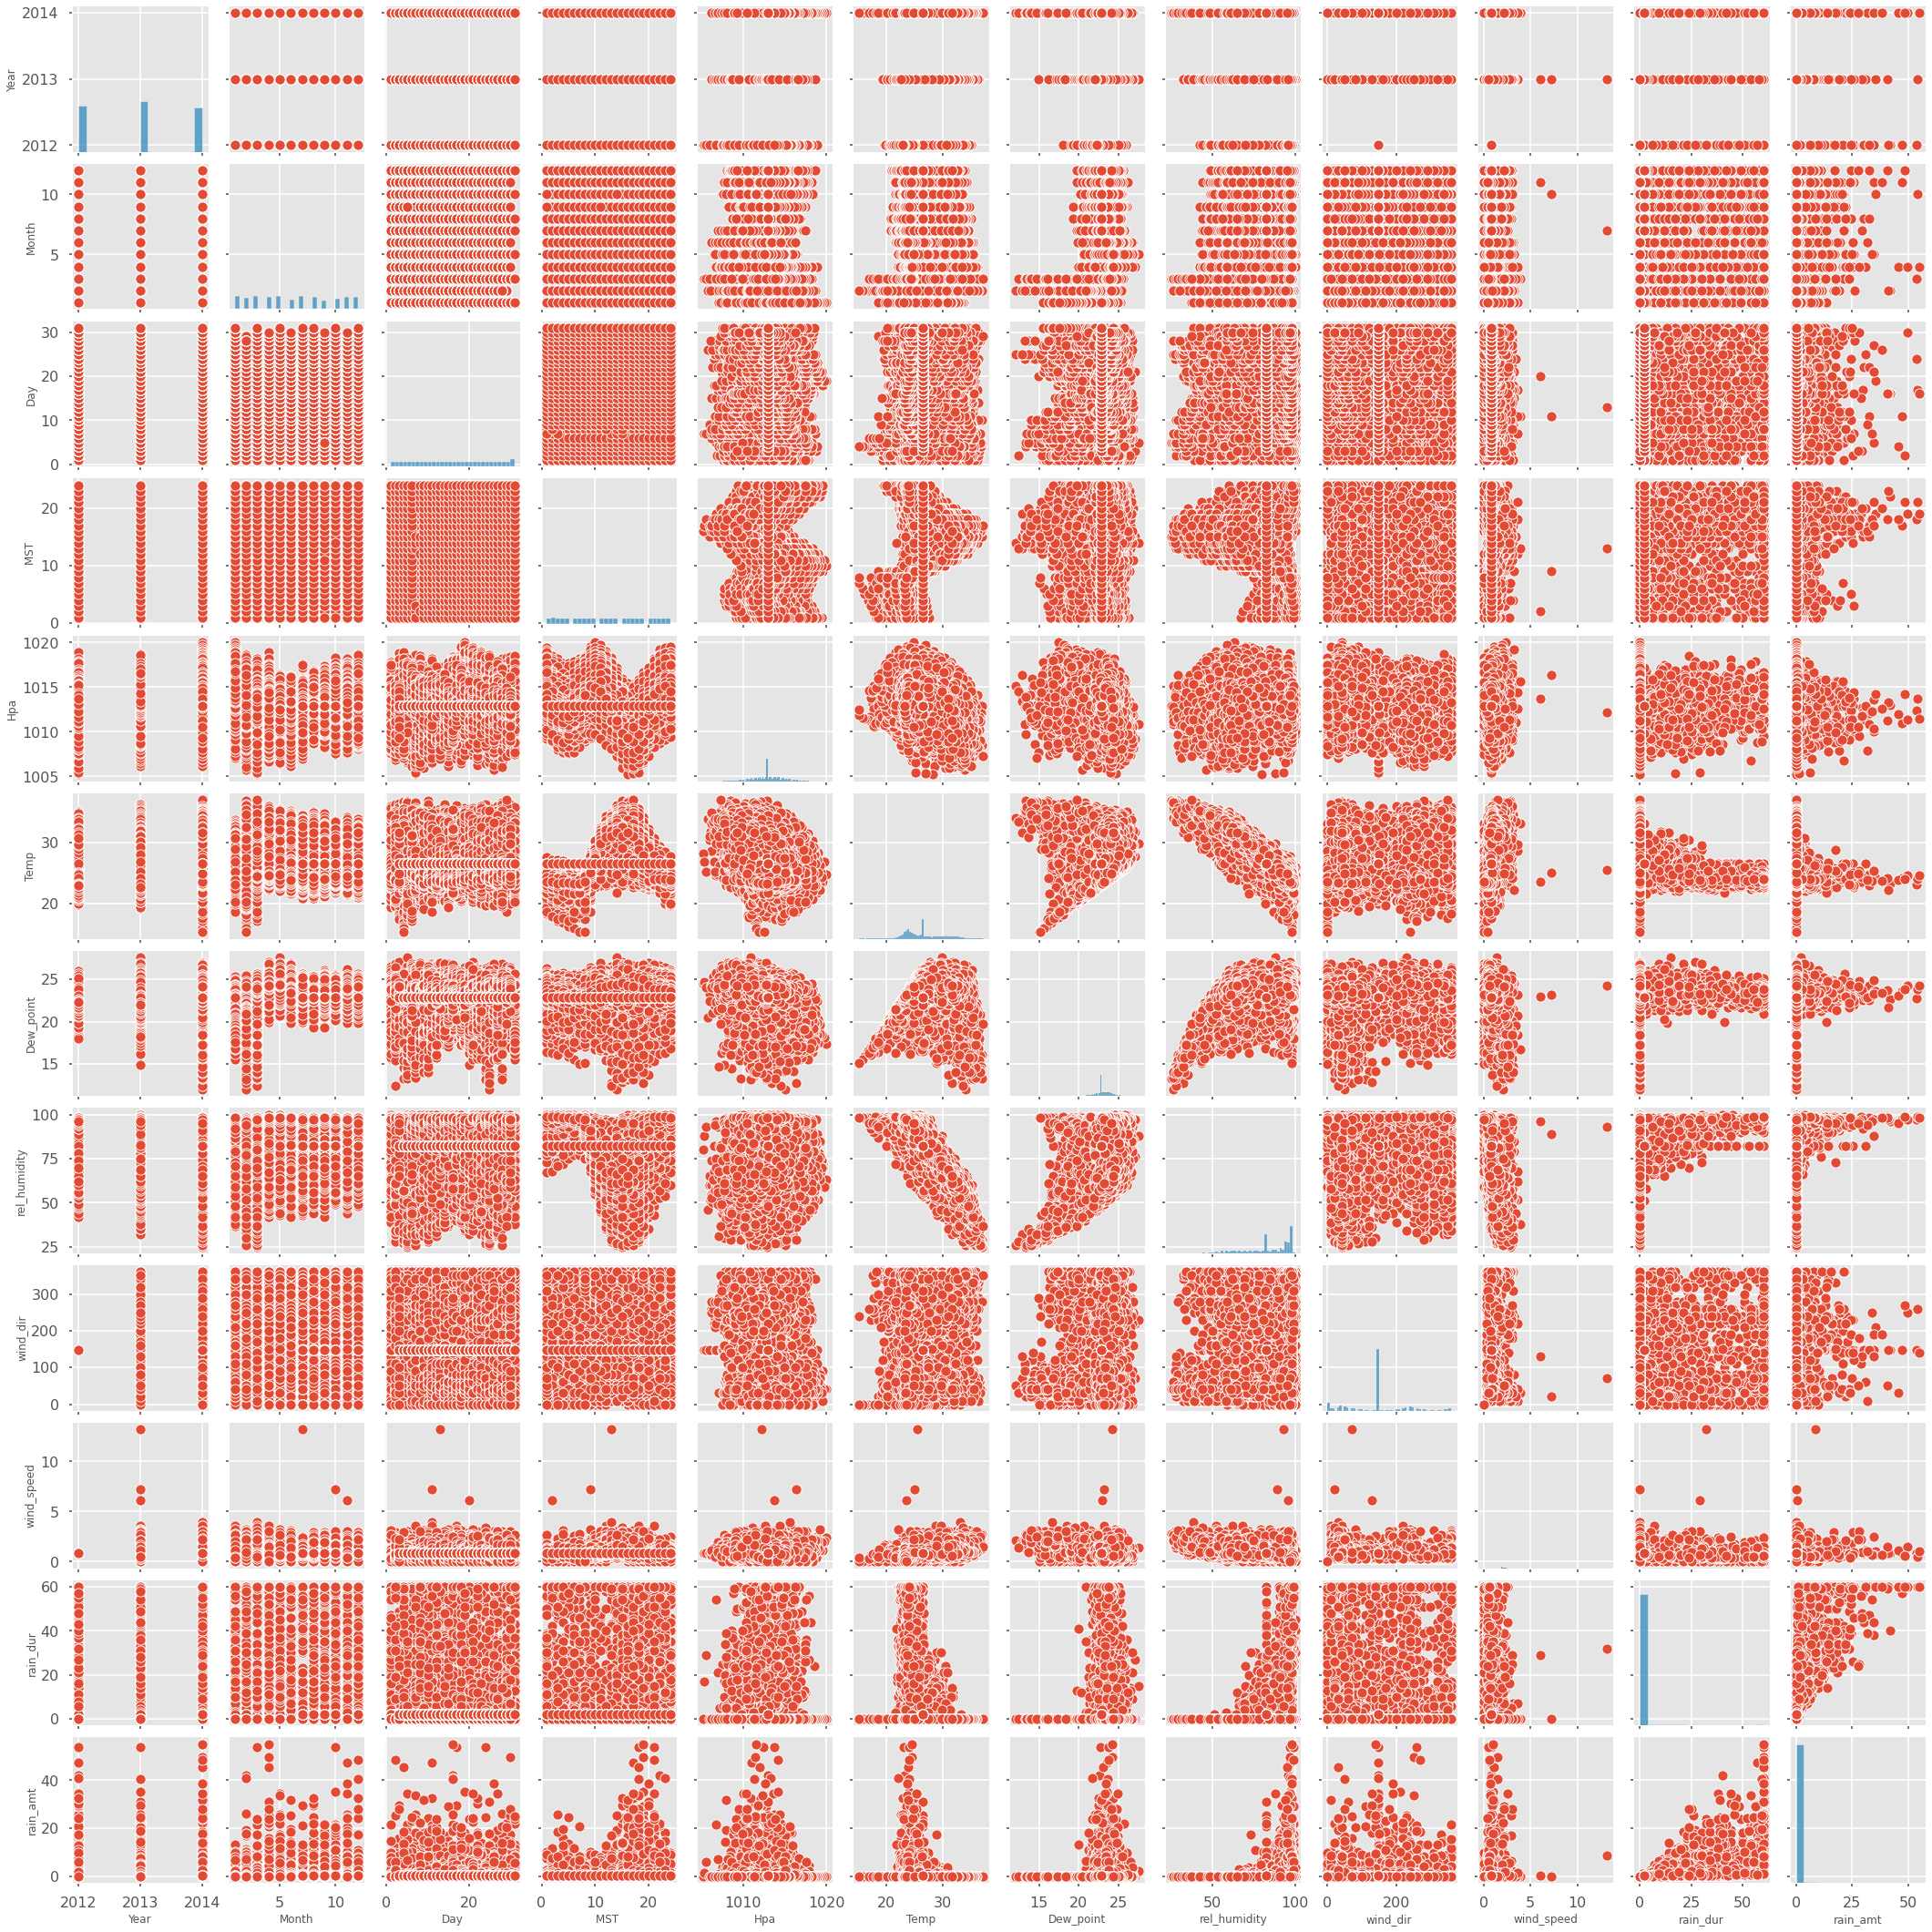

In [531]:
# pairplot of all the features
sns.pairplot(df)

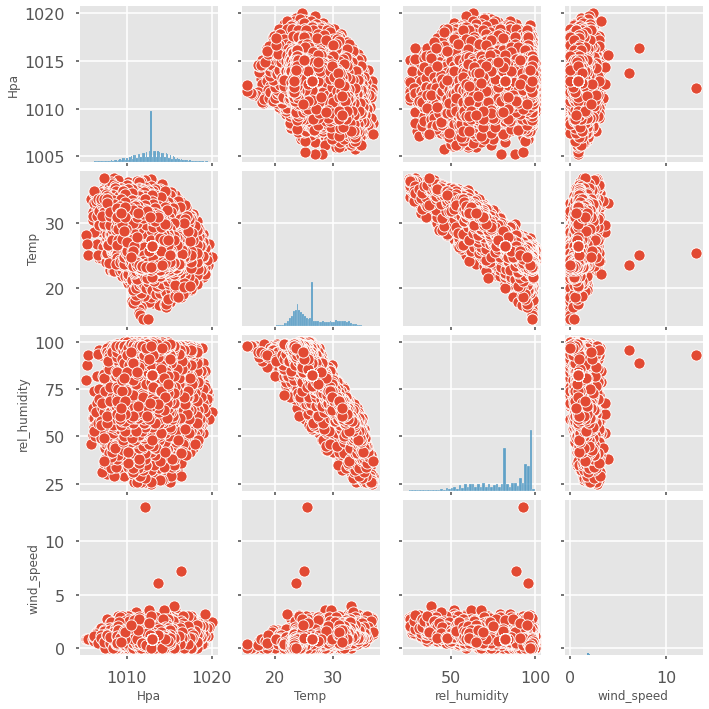

In [532]:
# pairplot of selected features:
sns.pairplot(df[['Hpa', 'Temp', 'rel_humidity', 'wind_speed']])

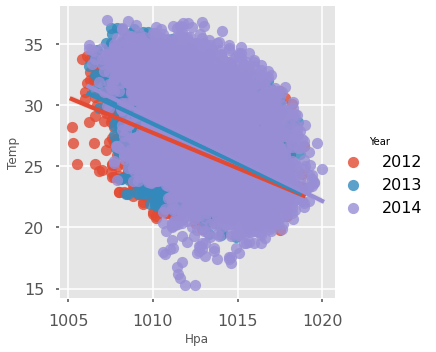

In [538]:
# visualizing Year and Temp apartment by Atmospheric Pressure
plt.figure(figsize = (200, 120))
sns.lmplot(x = 'Hpa', y = 'Temp', data = df, hue = 'Year')